In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-02-20_p180_bg_'
valid_code = '_val_26000_2000_'
postfix_time_seq_val = '_190824_1812'
postfix_time_seq = '_190824_1321'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_opt_p180"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_26000_2000__traindata_190824_1812.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_26000_2000__testdata_190824_1812.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__traindata_190824_1321.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__testdata_190824_1321.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                2520      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 70)                280  

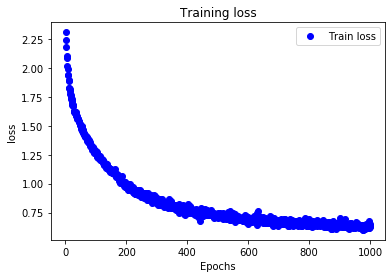

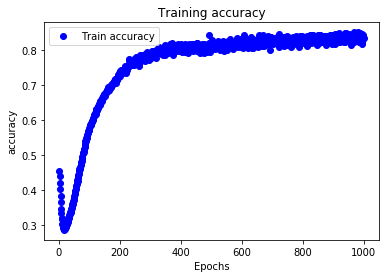

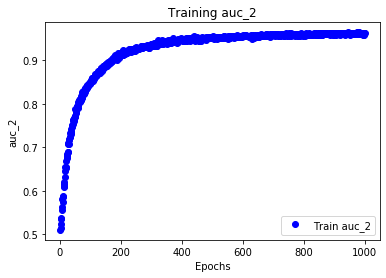

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_8 (Dropout)          (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 70)                280       
_________________________________________________________________
dense_11 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_9 (Dropout)          (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 45)                180       
_________________________________________________________________
dense_12 (Dense)             (None, 30)               

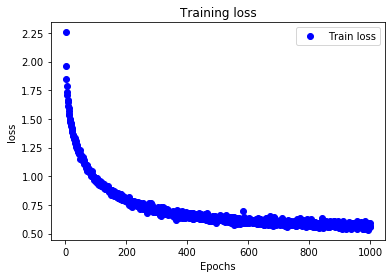

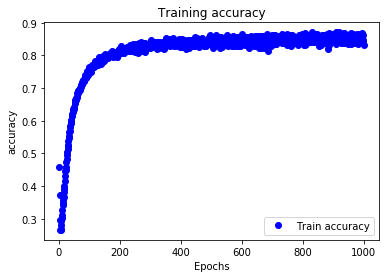

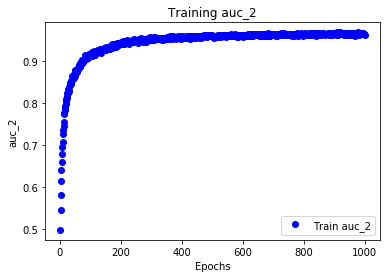

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_12 (B (None, 70)                280       
_________________________________________________________________
dense_16 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_13 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_13 (B (None, 45)                180       
_________________________________________________________________
dense_17 (Dense)             (None, 30)               

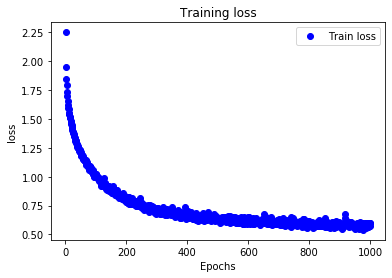

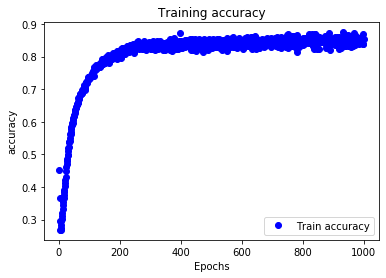

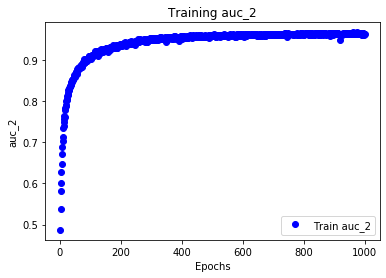

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_16 (B (None, 70)                280       
_________________________________________________________________
dense_21 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_17 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_17 (B (None, 45)                180       
_________________________________________________________________
dense_22 (Dense)             (None, 30)               

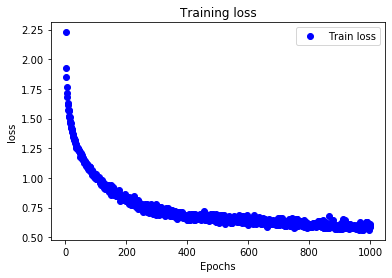

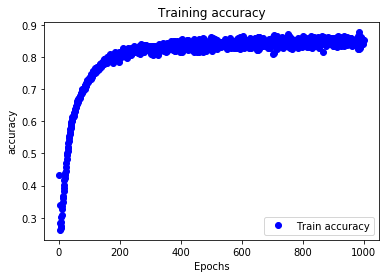

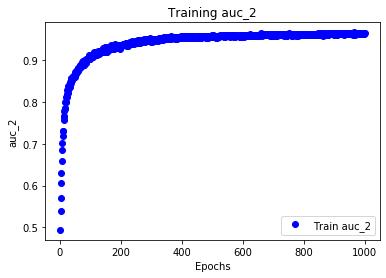

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_20 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_20 (B (None, 70)                280       
_________________________________________________________________
dense_26 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_21 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_21 (B (None, 45)                180       
_________________________________________________________________
dense_27 (Dense)             (None, 30)               

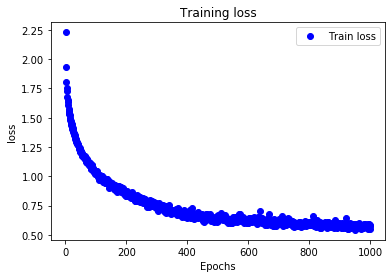

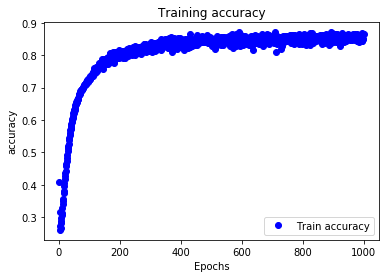

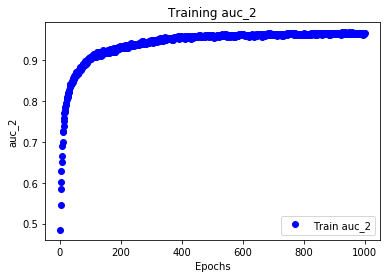

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_24 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_24 (B (None, 70)                280       
_________________________________________________________________
dense_31 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_25 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_25 (B (None, 45)                180       
_________________________________________________________________
dense_32 (Dense)             (None, 30)               

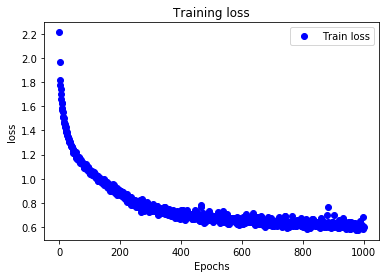

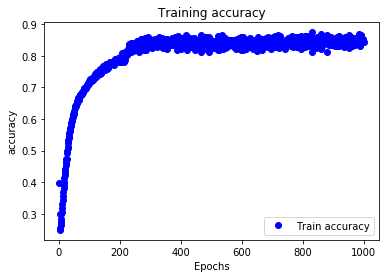

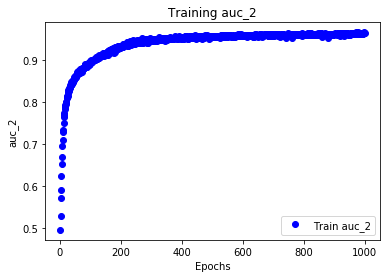

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_28 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_28 (B (None, 70)                280       
_________________________________________________________________
dense_36 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_29 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_29 (B (None, 45)                180       
_________________________________________________________________
dense_37 (Dense)             (None, 30)               

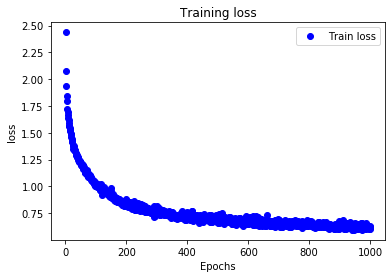

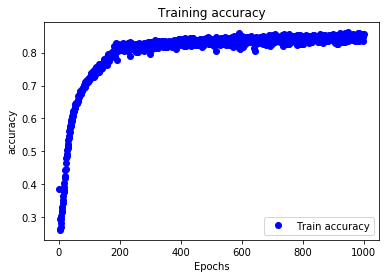

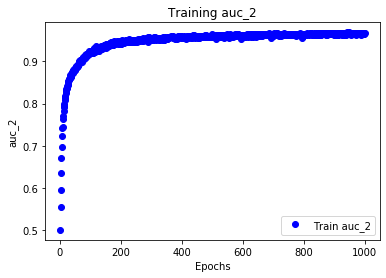

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_32 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_32 (B (None, 70)                280       
_________________________________________________________________
dense_41 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_33 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_33 (B (None, 45)                180       
_________________________________________________________________
dense_42 (Dense)             (None, 30)               

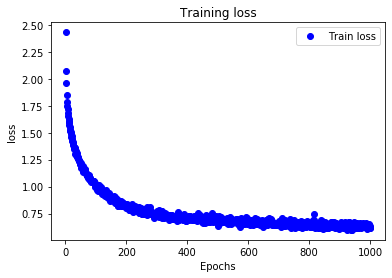

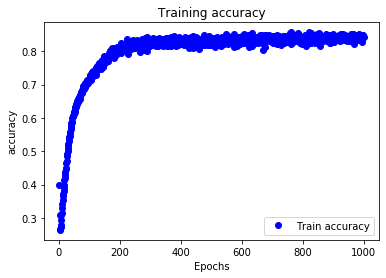

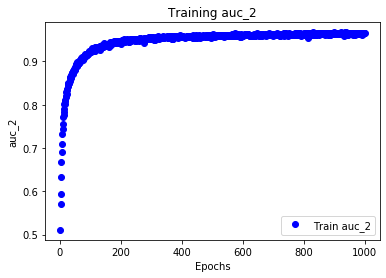

Validation AUC aggregating the results of 8 folds: 0.9524432017184958

Retraining the model using the full training set for proper testing...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_36 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_v2_36 (B (None, 70)                280       
_________________________________________________________________
dense_46 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_37 (Dropout)         (None, 45)                0         
_________________________________________________________________
batch_normalization_v2_37 (B (None, 45)     

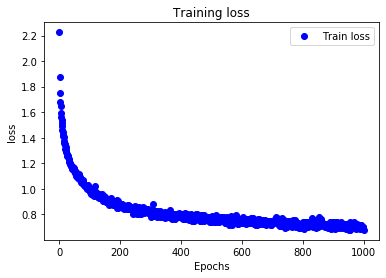

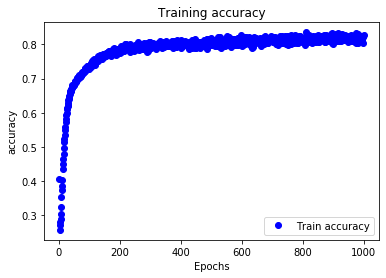

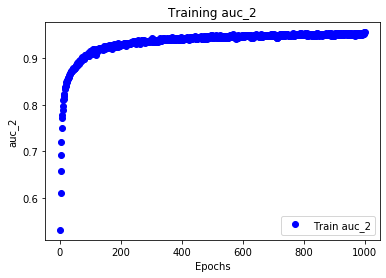

- Saving the model to ../data/models/MLP_enriched_time_seq26000_2000_opt_p180/...
Saving model to ../data/models/MLP_enriched_time_seq26000_2000_opt_p180/time_2018-02-20_p180_bg__sequential_19092_1057.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.9125  0.0875 ]
 [0.00194 0.00155]]
AUC 0.842
Confusion matrix:
[[14131  1355]
 [   30    24]]


2019/09/02 10:57:14 WARNING mlflow.tracking.context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



- Creating the new experiment 'MLP_enriched_time_seq26000_2000_opt_p180',  the following results will be saved in it...
- Tracking the experiment on mlflow...


Using TensorFlow backend.


- Experiment tracked.


In [3]:
experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                postfix_time_seq_val, valid_code, indexfile,
                         experiment_name=expname, 
                         hidden_layers_no=4,
                         hidden_nodes=[70, 45,30,15],
                         optimizer=Adam(0.001),
                         hl_activations=[tf.nn.relu]*4,
                         dropout=[0.5]*4,            #[0.5]*2,
                         loss_func = tf.keras.losses.BinaryCrossentropy(),
                         metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                         to_monitor=('accuracy', 0.9),
                         batch_norm_layers=[0,1,2,3,4],
                         validation_ep=True,
                         epochs=1000, 
                         batch_size=2048,
                         use_batch_and_steps=False,
                         class_1_weight=25,
                         pred_threshold = 0.55,
                         verbose=0,
                         early_stopping=True, 
                         save_model=True, 
                         save_results_for_viz=False,
                         mlf_tracking=True)